In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import datetime as dt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
cust_data = pd.read_excel('C:/Users/1234s/Desktop/Projects/14. Capstone Case Study - Finding-Marketing-Insights/Datasets/CustomersData.xlsx')
discount_coupon = pd.read_csv('C:/Users/1234s/Desktop/Projects/14. Capstone Case Study - Finding-Marketing-Insights/Datasets/Discount_Coupon.csv')
marketing_spend = pd.read_csv('C:/Users/1234s/Desktop/Projects/14. Capstone Case Study - Finding-Marketing-Insights/Datasets/Marketing_Spend.csv')
online_sales = pd.read_csv('C:/Users/1234s/Desktop/Projects/14. Capstone Case Study - Finding-Marketing-Insights/Datasets/Online_Sales.csv')
tax_amt = pd.read_excel('C:/Users/1234s/Desktop\Projects/14. Capstone Case Study - Finding-Marketing-Insights/Datasets/Tax_amount.xlsx')

In [3]:
cust_data.head(2)

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43


In [4]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


In [5]:
discount_coupon.head(2)

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20


In [6]:
# removing space from columns name
discount_coupon.columns = discount_coupon.columns.str.replace(' ', '')

In [7]:
discount_coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [8]:
marketing_spend.head(2)

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36


In [9]:
marketing_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [10]:
online_sales.head(2)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used


In [11]:
# Changing Transaction_Date to datetime format

online_sales['Transaction_Date'] = pd.to_datetime(online_sales.Transaction_Date , format= '%Y%m%d' )
online_sales['Month'] = online_sales['Transaction_Date'].apply(lambda x : pd.Timestamp.strftime(x, format = '%b'))
online_sales.head(2)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan


In [12]:
online_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  Month                52924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 4.4+ MB


In [13]:
tax_amt.head(2)

,Product_Category,GST
0,Nest-USA,0.1
1,Office,0.1


In [14]:
tax_amt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 452.0+ bytes


In [15]:
# merging the data

online_sales1 = pd.merge(online_sales , tax_amt , how = 'left',  left_on= 'Product_Category', right_on='Product_Category')
online_sales2 = pd.merge(online_sales1 , cust_data, how = 'left',  left_on= 'CustomerID', right_on='CustomerID')
final_data = pd.merge(online_sales2 , discount_coupon, how = 'left', on= ['Month','Product_Category'])

In [16]:
final_data.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,GST,Gender,Location,Tenure_Months,Coupon_Code,Discount_pct
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,0.10,M,Chicago,12,ELEC10,10.0
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,0.10,M,Chicago,12,ELEC10,10.0
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,0.10,M,Chicago,12,OFF10,10.0
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,0.18,M,Chicago,12,SALE10,10.0
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,0.18,M,Chicago,12,AIO10,10.0


## 1. Calculating Invoice amount

In [17]:
final_data['Invoice_amt'] = ((final_data.Quantity*final_data.Avg_Price)*((1-final_data.Discount_pct/100))*(1+final_data.GST))+final_data.Delivery_Charges

In [18]:
final_data['Sales_amt'] = ((final_data.Quantity*final_data.Avg_Price)*((1-final_data.Discount_pct/100)))

In [19]:
final_data.head(2)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,GST,Gender,Location,Tenure_Months,Coupon_Code,Discount_pct,Invoice_amt,Sales_amt
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,0.1,M,Chicago,12,ELEC10,10.0,158.6729,138.339
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,0.1,M,Chicago,12,ELEC10,10.0,158.6729,138.339


## 2. Exploratory Analysis

### • Understanding how many new customers acquired every month

In [20]:
final_data['Year_month'] = final_data.Transaction_Date.apply(lambda x: pd.Timestamp.strftime(x , format = "%Y-%m"))

In [21]:
cust_month = final_data.loc[:, ['CustomerID', 'Year_month']] 

In [22]:
cust_month.drop_duplicates(subset='CustomerID' , inplace= True)

In [23]:
new_cust_monthly = cust_month.groupby('Year_month')[['CustomerID']].count()
new_cust_monthly.head(2)

,CustomerID
Year_month,
2019-01,215
2019-02,96


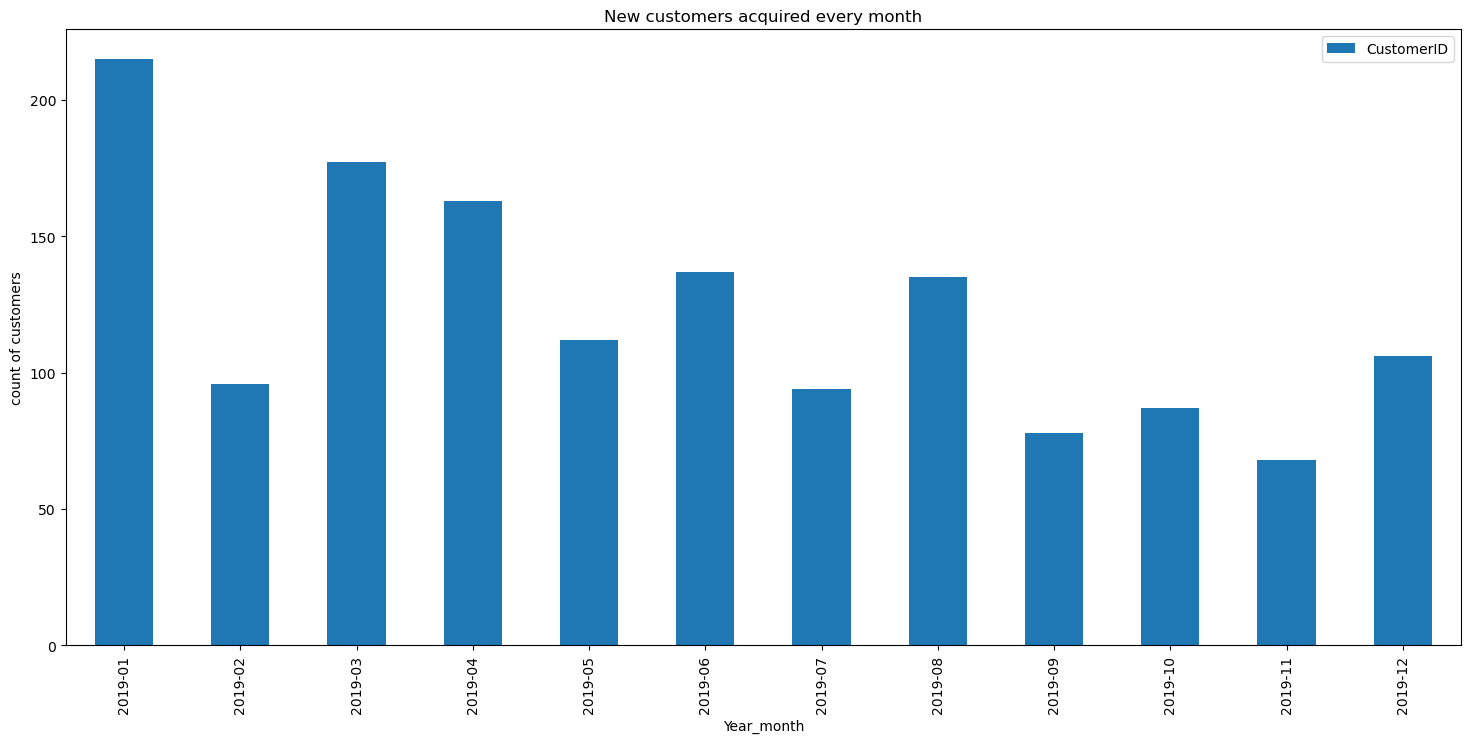

In [24]:
new_cust_monthly.plot( kind = 'bar', figsize = (18,8))
plt.ylabel('count of customers')
plt.title('New customers acquired every month')
plt.show()

### • Understand the retention of customers on month on month basis

In [25]:
cust_monthly_cnt = final_data.groupby('Year_month')[['CustomerID']].count().reset_index()
cust_monthly_cnt.head(2)

,Year_month,CustomerID
0,2019-01,4063
1,2019-02,3284


In [26]:
retented_cust_monthly = pd.merge(new_cust_monthly , cust_monthly_cnt , how= 'left' , on ="Year_month")
retented_cust_monthly.head(2)

,Year_month,CustomerID_x,CustomerID_y
0,2019-01,215,4063
1,2019-02,96,3284


In [27]:
retented_cust_monthly['retented_cust'] = retented_cust_monthly.CustomerID_y - retented_cust_monthly.CustomerID_x
retented_cust_monthly.head(2)

,Year_month,CustomerID_x,CustomerID_y,retented_cust
0,2019-01,215,4063,3848
1,2019-02,96,3284,3188


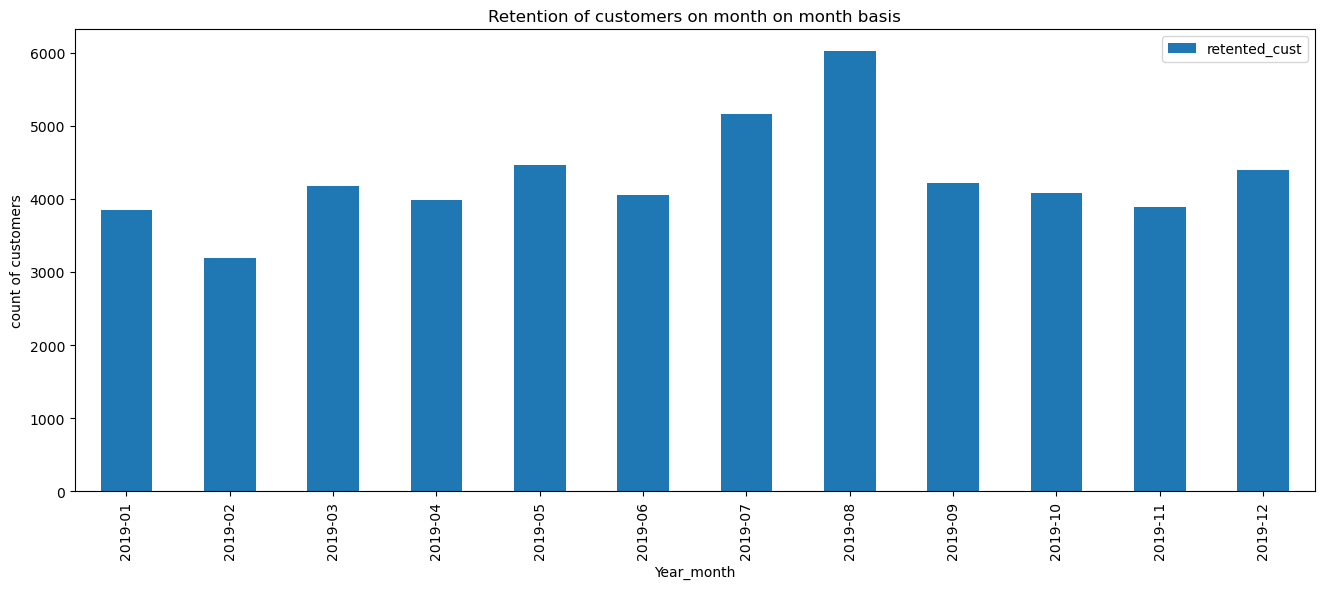

In [28]:
retented_cust_monthly.plot(kind= 'bar', x= 'Year_month' , y = 'retented_cust' , figsize = (16,6))
plt.ylabel('count of customers')
plt.title('Retention of customers on month on month basis')
plt.show()

### •  How the revenues from existing/new customers on month on month basis

In [29]:
rev_mouth = final_data.groupby('Year_month')[['Sales_amt']].sum()
rev_mouth.head(2)

,Sales_amt
Year_month,
2019-01,360949.347
2019-02,246658.920


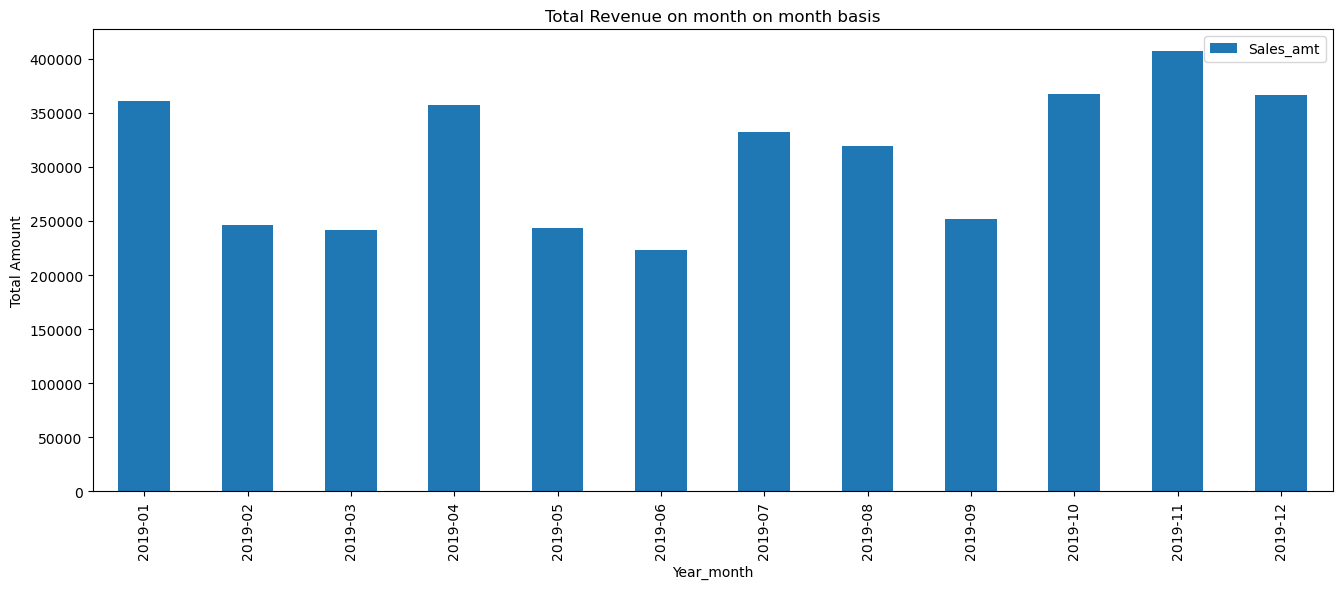

In [30]:
rev_mouth.plot( kind = 'bar', figsize =(16,6))
plt.ylabel('Total Amount')
plt.title('Total Revenue on month on month basis')
plt.show()

### • How the revenue from new customer on monthly bases

In [31]:
cust_month_invoice = final_data.loc[:, ['CustomerID', 'Year_month', 'Sales_amt']] 

In [32]:
cust_month_invoice.drop_duplicates(subset='CustomerID' , inplace= True)

In [33]:
new_cust_rev_monthly = cust_month_invoice.groupby('Year_month')[['Sales_amt']].sum()
new_cust_rev_monthly.head(2)

,Sales_amt
Year_month,
2019-01,16461.378
2019-02,6165.768


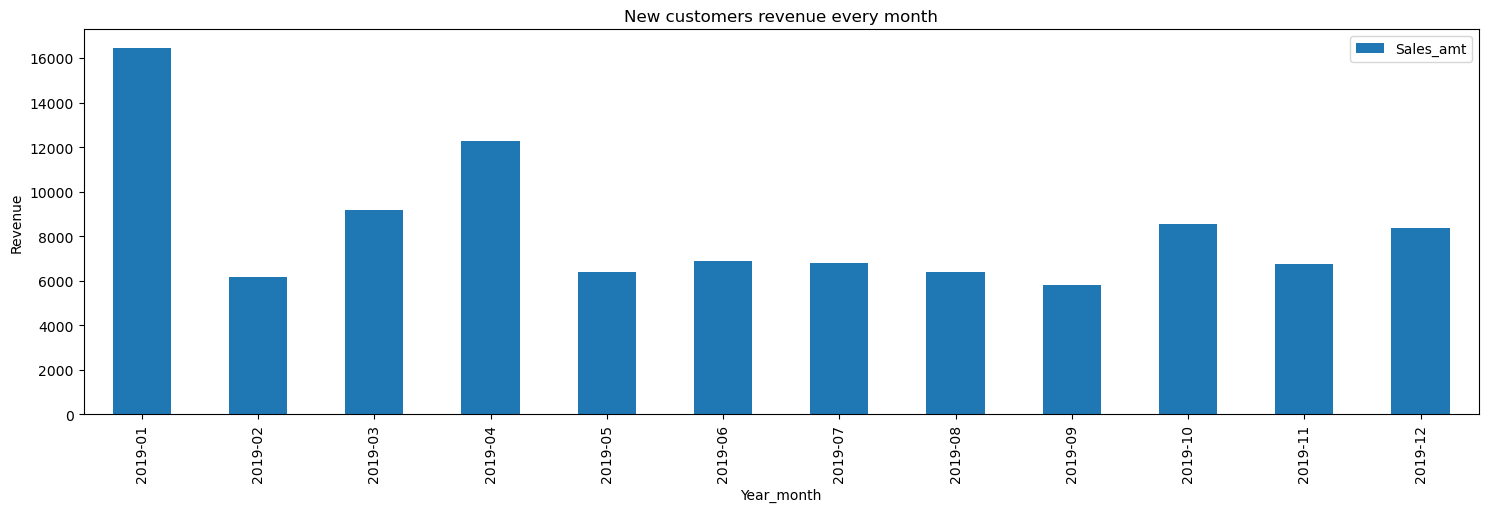

In [34]:
new_cust_rev_monthly.plot( kind = 'bar', figsize = (18,5))
plt.ylabel('Revenue')
plt.title('New customers revenue every month')
plt.show()

### • How the discount playing the role in revenue?


In [35]:
final_data.head(2)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,GST,Gender,Location,Tenure_Months,Coupon_Code,Discount_pct,Invoice_amt,Sales_amt,Year_month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,0.1,M,Chicago,12,ELEC10,10.0,158.6729,138.339,2019-01
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,0.1,M,Chicago,12,ELEC10,10.0,158.6729,138.339,2019-01


In [36]:
discount_rev = final_data.groupby('Discount_pct')[['Sales_amt']].sum()
discount_rev.head(2)

,Sales_amt
Discount_pct,
10.0,1417943.214
20.0,1216247.296


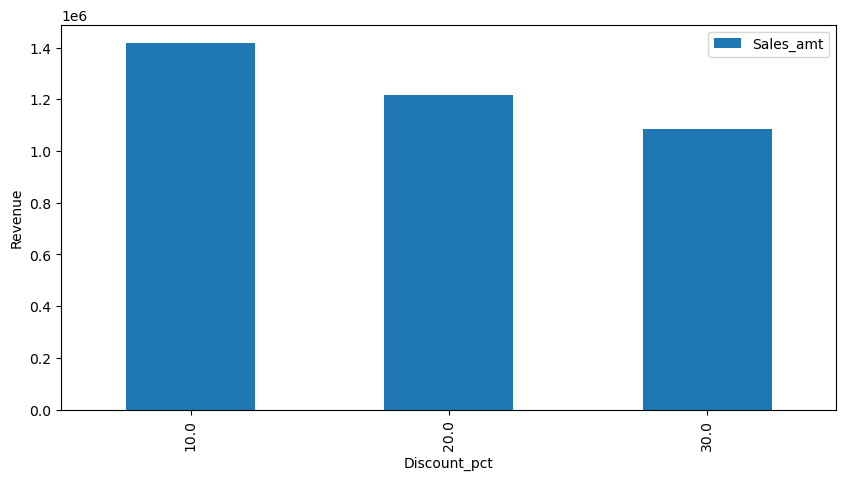

In [37]:
discount_rev.plot( kind = 'bar', figsize = (10,5))
plt.ylabel('Revenue')
plt.show()

### • Understand the trends/seasonality of sales, quantity by category, month, week, day,etc…

In [38]:
# Seasonality of sales, quantity by month.
cat_qty_sales = final_data.groupby('Year_month').agg({'Quantity':'sum',
                                                       'Sales_amt': 'sum'}).reset_index().rename(columns={'Sales_amt':'sales'})
round(cat_qty_sales,2)

,Year_month,Quantity,sales
0,2019-01,20140,360949.35
1,2019-02,16575,246658.92
2,2019-03,20787,241980.71
3,2019-04,25277,357159.75
4,2019-05,18715,243165.42
5,2019-06,21619,223357.22
6,2019-07,22898,332562.23
7,2019-08,27457,319556.82
8,2019-09,19353,251858.07
9,2019-10,17425,367271.88


### • How market spend is impacting the revenue?

In [39]:
marketing_spend.head(2)

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36


In [40]:
marketing_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [41]:
marketing_spend['Date'] = pd.to_datetime(marketing_spend.Date , format= '%m/%d/%Y' )

In [42]:
marketing_spend['Year_month'] = marketing_spend.Date.apply(lambda x: pd.Timestamp.strftime(x , format = "%Y-%m"))

In [43]:
marketing_spend['Total_spend'] = marketing_spend.Offline_Spend + marketing_spend.Online_Spend

In [44]:
marketing_spend.head(2)

,Date,Offline_Spend,Online_Spend,Year_month,Total_spend
0,2019-01-01,4500,2424.50,2019-01,6924.50
1,2019-01-02,4500,3480.36,2019-01,7980.36


In [45]:
montly_spend = marketing_spend.groupby('Year_month')['Total_spend'].sum().reset_index()
montly_spend.head(2)

,Year_month,Total_spend
0,2019-01,154928.95
1,2019-02,137107.92


In [46]:
montly_rev = final_data.groupby('Year_month')['Sales_amt'].sum().reset_index()
montly_rev.head(2)

,Year_month,Sales_amt
0,2019-01,360949.347
1,2019-02,246658.920


In [47]:
pd.merge(montly_spend, montly_rev, how = 'left', on='Year_month' )

,Year_month,Total_spend,Sales_amt
0,2019-01,154928.95,360949.347
1,2019-02,137107.92,246658.920
2,2019-03,122250.09,241980.711
3,2019-04,157026.83,357159.753
4,2019-05,118259.64,243165.424
5,2019-06,134318.14,223357.225
6,2019-07,120217.85,332562.231
7,2019-08,142904.15,319556.824
8,2019-09,135514.54,251858.068
9,2019-10,151224.65,367271.883


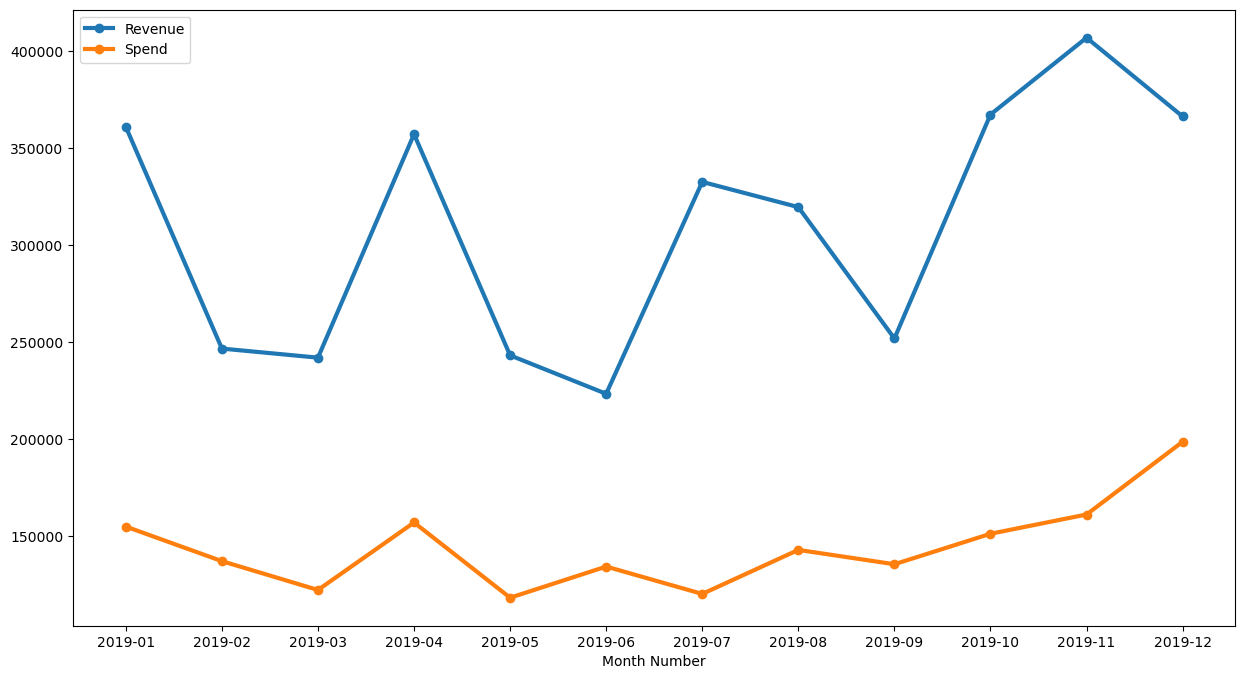

In [48]:
plt.figure(figsize= (15,8))
plt.plot(montly_rev.Year_month, montly_rev.Sales_amt,   label = 'Revenue', marker='o', linewidth=3)
plt.plot(montly_spend.Year_month, montly_spend.Total_spend,   label = 'Spend',  marker='o', linewidth=3)

plt.xlabel('Month Number')
plt.legend(loc='upper left')
plt.show()

### • Which product was purchased most based on the quantity?

In [49]:
prod_qty = final_data.groupby('Product_Category')['Quantity'].sum().reset_index()

In [50]:
prod_qty.sort_values(by='Quantity', ascending=False).head(1)

,Product_Category,Quantity
18,Office,88383


## 3.Performing Customer Segmentation

In [51]:
final_data.head(2)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,GST,Gender,Location,Tenure_Months,Coupon_Code,Discount_pct,Invoice_amt,Sales_amt,Year_month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,0.1,M,Chicago,12,ELEC10,10.0,158.6729,138.339,2019-01
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,0.1,M,Chicago,12,ELEC10,10.0,158.6729,138.339,2019-01


In [52]:
# Setting a date to extract recency 

date = dt.datetime(2020, 2, 20)

In [53]:
cust_mf = final_data.groupby('CustomerID').agg({'Transaction_ID':'count',
                                                'Sales_amt':'sum'}).reset_index().rename(columns={'Transaction_ID': 'frequency', 'Sales_amt': 'monetary'})
cust_mf

,CustomerID,frequency,monetary
0,12346,2,21.693
1,12347,60,9930.649
2,12348,23,1142.502
3,12350,17,952.049
4,12356,36,1009.729
...,...,...,...
1463,18259,7,474.075
1464,18260,40,1753.041
1465,18269,8,88.466
1466,18277,1,268.200


In [54]:
cust_recency = final_data.loc[:,['CustomerID','Transaction_Date']]

In [55]:
cust_recency = cust_recency.drop_duplicates(subset='CustomerID', keep='last')

In [56]:
cust_recency['recency'] = (date - cust_recency.Transaction_Date).dt.days

In [57]:
seg_df = pd.merge(cust_recency, cust_mf, how= 'right', on= 'CustomerID')

In [58]:
seg_df.drop(columns='Transaction_Date', inplace=True)
seg_df.head()

,CustomerID,recency,frequency,monetary
0,12346,158,2,21.693
1,12347,110,60,9930.649
2,12348,124,23,1142.502
3,12350,68,17,952.049
4,12356,158,36,1009.729


## Value based segmentation

In [59]:
# creating Deciles

seg_df['decile'] = pd.qcut(seg_df['monetary'], 10, labels=False)

In [60]:
seg_df.head()

,CustomerID,recency,frequency,monetary,decile
0,12346,158,2,21.693,0
1,12347,110,60,9930.649,9
2,12348,124,23,1142.502,4
3,12350,68,17,952.049,3
4,12356,158,36,1009.729,4


In [61]:
seg_df.decile.value_counts()

decile
0    148
9    147
4    147
2    147
8    147
5    147
7    147
3    146
1    146
6    146
Name: count, dtype: int64

In [62]:
# Key performace variable selection
col_kpi=['monetary','recency','frequency']

In [63]:
#Profiling
VB_Profiling=seg_df.groupby(['decile']).apply(lambda x: x[col_kpi].mean())

In [64]:
VB_Profiling = seg_df.groupby(['decile'])[col_kpi].mean()


In [65]:
VB_Profiling.T

decile,0,1,2,3,4,5,6,7,8,9
monetary,51.723115,259.098123,523.656578,796.238459,1168.956190,1627.954803,2234.213151,3140.033150,4689.324469,10821.081374
recency,236.310811,218.863014,216.435374,205.753425,209.000000,197.965986,176.417808,174.503401,177.911565,139.585034
frequency,3.000000,7.787671,11.687075,14.801370,19.802721,24.931973,33.602740,46.013605,64.707483,134.054422


In [66]:
profiling_output = VB_Profiling.T

In [67]:
profiling_output

decile,0,1,2,3,4,5,6,7,8,9
monetary,51.723115,259.098123,523.656578,796.238459,1168.956190,1627.954803,2234.213151,3140.033150,4689.324469,10821.081374
recency,236.310811,218.863014,216.435374,205.753425,209.000000,197.965986,176.417808,174.503401,177.911565,139.585034
frequency,3.000000,7.787671,11.687075,14.801370,19.802721,24.931973,33.602740,46.013605,64.707483,134.054422


### RFM SEGMENTATION

In [68]:
# Creating quartiles

quantiles = seg_df[['frequency','monetary','recency' ]].quantile(q=[0.25,0.5,0.75])
quantiles

,frequency,monetary,recency
0.25,10.0,509.48475,106.0
0.50,21.0,1406.88100,182.0
0.75,46.0,3142.38125,271.0


In [69]:
quantiles = quantiles.to_dict()
quantiles

{'frequency': {0.25: 10.0, 0.5: 21.0, 0.75: 46.0},
 'monetary': {0.25: 509.48474999999996, 0.5: 1406.881, 0.75: 3142.38125},
 'recency': {0.25: 106.0, 0.5: 182.0, 0.75: 271.0}}

In [70]:
#We create two classes for the RFM segmentation since, being high recency is bad, while high frequency and monetary value is good.
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [71]:
seg_df['R_Quartile'] = seg_df['recency'].apply(RClass, args=('recency',quantiles,))
seg_df['F_Quartile'] = seg_df['frequency'].apply(FMClass, args=('frequency',quantiles,))
seg_df['M_Quartile'] = seg_df['monetary'].apply(FMClass, args=('monetary',quantiles,))

In [72]:
seg_df.head()

,CustomerID,recency,frequency,monetary,decile,R_Quartile,F_Quartile,M_Quartile
0,12346,158,2,21.693,0,2,4,4
1,12347,110,60,9930.649,9,2,1,1
2,12348,124,23,1142.502,4,2,2,3
3,12350,68,17,952.049,3,1,3,3
4,12356,158,36,1009.729,4,2,2,3


In [73]:
seg_df1=seg_df.assign(R_seg=np.nan, FM_seg =np.nan)
seg_df1.R_seg[seg_df['R_Quartile']==4] = "3_Churn"
seg_df1.R_seg[seg_df['R_Quartile']==2] = "2_At_Risk"
seg_df1.R_seg[seg_df['R_Quartile']==3] = "2_At_Risk"
seg_df1.R_seg[seg_df['R_Quartile']==1] = "1_Active"

seg_df1.FM_seg[(seg_df['F_Quartile']==3) & (seg_df['M_Quartile']==1)] = "2_Gold"
seg_df1.FM_seg[(seg_df['F_Quartile']==4) & (seg_df['M_Quartile']==1)] = "2_Gold"
seg_df1.FM_seg[(seg_df['F_Quartile']==2) & (seg_df['M_Quartile']==2)] = "2_Gold"
seg_df1.FM_seg[(seg_df['F_Quartile']==2) & (seg_df['M_Quartile']==1)] = "2_Gold"
seg_df1.FM_seg[(seg_df['F_Quartile']==3) & (seg_df['M_Quartile']==2)] = "2_Gold"
seg_df1.FM_seg[(seg_df['F_Quartile']==4) & (seg_df['M_Quartile']==2)] = "1_Silver"
seg_df1.FM_seg[(seg_df['F_Quartile']==1) & (seg_df['M_Quartile']==3)] = "2_Gold"
seg_df1.FM_seg[(seg_df['F_Quartile']==2) & (seg_df['M_Quartile']==3)] = "2_Gold"
seg_df1.FM_seg[(seg_df['F_Quartile']==3) & (seg_df['M_Quartile']==3)] = "1_Silver"
seg_df1.FM_seg[(seg_df['F_Quartile']==4) & (seg_df['M_Quartile']==3)] = "1_Silver"
seg_df1.FM_seg[(seg_df['F_Quartile']==1) & (seg_df['M_Quartile']==4)] = "2_Gold"
seg_df1.FM_seg[(seg_df['F_Quartile']==1) & (seg_df['M_Quartile']==2)] = "2_Gold"
seg_df1.FM_seg[(seg_df['F_Quartile']==2) & (seg_df['M_Quartile']==4)] = "1_Silver"
seg_df1.FM_seg[(seg_df['F_Quartile']==3) & (seg_df['M_Quartile']==4)] = "1_Silver"
seg_df1.FM_seg[(seg_df['F_Quartile']==4) & (seg_df['M_Quartile']==4)] = "0_Standard"

seg_df1.FM_seg.fillna("4_Premium", inplace=True)

In [74]:
seg_df1.head(5)

,CustomerID,recency,frequency,monetary,decile,R_Quartile,F_Quartile,M_Quartile,R_seg,FM_seg
0,12346,158,2,21.693,0,2,4,4,2_At_Risk,0_Standard
1,12347,110,60,9930.649,9,2,1,1,2_At_Risk,4_Premium
2,12348,124,23,1142.502,4,2,2,3,2_At_Risk,2_Gold
3,12350,68,17,952.049,3,1,3,3,1_Active,1_Silver
4,12356,158,36,1009.729,4,2,2,3,2_At_Risk,2_Gold


In [75]:
# Key performace variable selection
col_kpi=['monetary','recency','frequency']

In [76]:
#Profiling
Profiling=seg_df1.groupby(['R_seg', 'FM_seg']).apply(lambda x: x[col_kpi].mean()).T

In [77]:
Profiling

R_seg        1_Active                                         2_At_Risk  \
FM_seg     0_Standard    1_Silver       2_Gold    4_Premium  0_Standard   
monetary   242.059257  826.715143  2393.159021  9088.011212  172.849157   
recency     72.457143   74.528571    78.020548    77.016949  191.444444   
frequency    4.371429   12.928571    30.041096   115.491525    4.601307   

R_seg                                               3_Churn              \
FM_seg       1_Silver       2_Gold    4_Premium  0_Standard    1_Silver   
monetary   760.850944  2190.131802  6561.446391  168.305390  812.445667   
recency    187.635897   181.988095   169.360902  339.047619  339.419048   
frequency   13.415385    34.793651    97.466165    3.552381   12.819048   

R_seg                                
FM_seg          2_Gold    4_Premium  
monetary   2162.754414  6379.922956  
recency     334.837838   350.777778  
frequency    31.387387    79.955556

In [78]:
#Need to retrive Premium customers who are churn now

seg_df1[((seg_df1.R_seg =="3.Churn") & (seg_df1.FM_seg =="4.Premium")) ]

,CustomerID,recency,frequency,monetary,decile,R_Quartile,F_Quartile,M_Quartile,R_seg,FM_seg


### Scientific (using K-means)

In [79]:
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA  

In [80]:
seg_df2 = seg_df.loc[:,['recency','frequency','monetary']]
seg_df2.head() 

,recency,frequency,monetary
0,158,2,21.693
1,110,60,9930.649
2,124,23,1142.502
3,68,17,952.049
4,158,36,1009.729


In [81]:
#standardize the data

sc = StandardScaler()
sc = sc.fit(seg_df2)
seg_df2_std = pd.DataFrame(sc.transform(seg_df2), columns = seg_df2.columns)
seg_df2_std.head(2)

,recency,frequency,monetary
0,-0.365961,-0.669410,-0.614642
1,-0.837001,0.470788,1.811083


In [82]:
#KMeans Clustering   input: standardized data, number of cluster
km_3 = KMeans(n_clusters=3, random_state=123).fit(seg_df2)
km_4 = KMeans(n_clusters=4, random_state=123).fit(seg_df2)
km_5 = KMeans(n_clusters=5, random_state=123).fit(seg_df2)
km_6 = KMeans(n_clusters=6, random_state=123).fit(seg_df2)
km_7 = KMeans(n_clusters=7, random_state=123).fit(seg_df2)
km_8 = KMeans(n_clusters=8, random_state=123).fit(seg_df2)

In [83]:
seg_df2_std['Cluster_3'] = km_3.labels_
seg_df2_std['Cluster_4'] = km_4.labels_
seg_df2_std['Cluster_5'] = km_5.labels_
seg_df2_std['Cluster_6'] = km_6.labels_
seg_df2_std['Cluster_7'] = km_7.labels_
seg_df2_std['Cluster_8'] = km_8.labels_

In [84]:
print('km_3 =',silhouette_score(seg_df2_std, km_3.labels_))
print('km_4 =',silhouette_score(seg_df2_std, km_4.labels_))
print('km_5 =',silhouette_score(seg_df2_std, km_5.labels_))
print('km_6 =',silhouette_score(seg_df2_std, km_6.labels_))
print('km_7 =',silhouette_score(seg_df2_std, km_7.labels_))
print('km_8 =',silhouette_score(seg_df2_std, km_8.labels_))

km_3 = 0.3465772101260062
km_4 = 0.5039609210812508
km_5 = 0.5306289545372532
km_6 = 0.5330111037453765
km_7 = 0.5302800366495588
km_8 = 0.4932086503796093


In [85]:
predect_seg = pd.DataFrame(seg_df2_std.Cluster_4 ).rename(columns={'Cluster_4':'Pred_seg'})
predect_seg

,Pred_seg
0,0
1,1
2,0
3,0
4,0
...,...
1463,0
1464,0
1465,0
1466,0


In [86]:
seg_kmeans = pd.concat([seg_df, predect_seg], axis=1)
seg_kmeans.drop(columns = ['decile','R_Quartile','F_Quartile','M_Quartile'], axis=1,inplace = True)

In [87]:
seg_kmeans

,CustomerID,recency,frequency,monetary,Pred_seg
0,12346,158,2,21.693,0
1,12347,110,60,9930.649,1
2,12348,124,23,1142.502,0
3,12350,68,17,952.049,0
4,12356,158,36,1009.729,0
...,...,...,...,...,...
1463,18259,321,7,474.075,0
1464,18260,138,40,1753.041,0
1465,18269,245,8,88.466,0
1466,18277,120,1,268.200,0


## 4. Predicting customers lifetime value 

In [88]:
# Calculating Average Customer Lifespan in days

cust_month = final_data[['CustomerID','Transaction_Date']]

In [89]:
cust_month1 = cust_month.groupby('CustomerID')['Transaction_Date'].min().reset_index()
cust_month2 = cust_month.groupby('CustomerID')['Transaction_Date'].max().reset_index()

In [90]:
cust_month3 = pd.merge(cust_month1, cust_month2, on='CustomerID' ,how= 'left')

In [91]:
cust_month3['days_diff'] = (cust_month3.Transaction_Date_y- cust_month3.Transaction_Date_x).dt.days

In [92]:
# Average Customer Lifespan 

ACL = cust_month3.days_diff.mean()/ cust_month3.CustomerID.count()
ACL

0.04384127508556749

In [93]:
cust_data.head(2)

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43


In [94]:
seg_df1.head(2)

,CustomerID,recency,frequency,monetary,decile,R_Quartile,F_Quartile,M_Quartile,R_seg,FM_seg
0,12346,158,2,21.693,0,2,4,4,2_At_Risk,0_Standard
1,12347,110,60,9930.649,9,2,1,1,2_At_Risk,4_Premium


In [95]:
cust_rev = seg_df1

In [96]:
cust_rev.rename(columns={'monetary': 'Revenue'}, inplace=True)

In [97]:
# CLTV is customer lifetime value
cust_rev['CLTV'] = cust_rev.Revenue * ACL

In [98]:
def lifetime_value (x):
    if x.CLTV < 50 :
        return 2
    elif x.CLTV < 200:
        return 1
    else :
        return 0
    
# High value = 1
# Medium value = 2
# Low value = 3

In [99]:
cust_rev['CLTV'] = cust_rev.apply(lifetime_value, axis=1)


In [100]:
cust_rev

,CustomerID,recency,frequency,Revenue,decile,R_Quartile,F_Quartile,M_Quartile,R_seg,FM_seg,CLTV
0,12346,158,2,21.693,0,2,4,4,2_At_Risk,0_Standard,2
1,12347,110,60,9930.649,9,2,1,1,2_At_Risk,4_Premium,0
2,12348,124,23,1142.502,4,2,2,3,2_At_Risk,2_Gold,1
3,12350,68,17,952.049,3,1,3,3,1_Active,1_Silver,2
4,12356,158,36,1009.729,4,2,2,3,2_At_Risk,2_Gold,2
...,...,...,...,...,...,...,...,...,...,...,...
1463,18259,321,7,474.075,2,4,4,4,3_Churn,0_Standard,2
1464,18260,138,40,1753.041,5,2,2,2,2_At_Risk,2_Gold,1
1465,18269,245,8,88.466,0,3,4,4,2_At_Risk,0_Standard,2
1466,18277,120,1,268.200,1,2,4,4,2_At_Risk,0_Standard,2


In [101]:
cust_rev.CLTV.value_counts()

CLTV
2    649
1    587
0    232
Name: count, dtype: int64

In [102]:
cust_data_new = pd.merge(cust_data,cust_rev, how='left' ,on='CustomerID')
cust_data_new

,CustomerID,Gender,Location,Tenure_Months,recency,frequency,Revenue,decile,R_Quartile,F_Quartile,M_Quartile,R_seg,FM_seg,CLTV
0,17850,M,Chicago,12,390,297,30964.878,9,4,1,1,3_Churn,4_Premium,0
1,13047,M,California,43,64,44,2321.227,6,1,2,2,1_Active,2_Gold,1
2,12583,M,Chicago,33,202,42,1971.352,6,3,2,2,2_At_Risk,2_Gold,1
3,13748,F,California,30,415,1,1.116,0,4,4,4,3_Churn,0_Standard,2
4,15100,M,California,49,174,6,762.752,3,2,4,3,2_At_Risk,1_Silver,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,14438,F,New York,41,51,9,354.816,1,1,4,4,1_Active,0_Standard,2
1464,12956,F,Chicago,48,51,19,2101.407,6,1,3,2,1_Active,2_Gold,1
1465,15781,M,New Jersey,19,51,5,514.703,2,1,4,3,1_Active,1_Silver,2
1466,14410,F,New York,45,51,8,776.293,3,1,4,3,1_Active,1_Silver,2


In [103]:
# Creating dummie variables
cust_data_new = pd.get_dummies(cust_data_new, columns=['Location'], drop_first=True, prefix='Location')
cust_data_new = pd.get_dummies(cust_data_new, columns=['Gender'], drop_first=True, prefix='Gender')
cust_data_new = pd.get_dummies(cust_data_new, columns=['R_seg'], drop_first=True, prefix='R_seg')
cust_data_new = pd.get_dummies(cust_data_new, columns=['FM_seg'], drop_first=True, prefix='FM_seg')

In [104]:
cust_data_new.head(2)

,CustomerID,Tenure_Months,recency,frequency,Revenue,decile,R_Quartile,F_Quartile,M_Quartile,CLTV,Location_Chicago,Location_New Jersey,Location_New York,Location_Washington DC,Gender_M,R_seg_2_At_Risk,R_seg_3_Churn,FM_seg_1_Silver,FM_seg_2_Gold,FM_seg_4_Premium
0,17850,12,390,297,30964.878,9,4,1,1,0,True,False,False,False,True,False,True,False,False,True
1,13047,43,64,44,2321.227,6,1,2,2,1,False,False,False,False,True,False,False,False,True,False


### Balancing the data

In [105]:
from imblearn.over_sampling import SMOTE

In [106]:
x = cust_data_new.loc[:,cust_data_new.columns.difference(['CLTV'])]
y = cust_data_new.CLTV

In [107]:
#balancing the data
sm = SMOTE()
resampled_X, resampled_y = sm.fit_resample(x, y)

In [108]:
resampled_y.value_counts()

CLTV
0    649
1    649
2    649
Name: count, dtype: int64

In [109]:
cust_data_new2 = pd.concat([resampled_X, resampled_y], axis=1)

In [110]:
cust_data_new2.head(2)

,CustomerID,FM_seg_1_Silver,FM_seg_2_Gold,FM_seg_4_Premium,F_Quartile,Gender_M,Location_Chicago,Location_New Jersey,Location_New York,Location_Washington DC,M_Quartile,R_Quartile,R_seg_2_At_Risk,R_seg_3_Churn,Revenue,Tenure_Months,decile,frequency,recency,CLTV
0,17850,False,False,True,1,True,True,False,False,False,1,4,False,True,30964.878,12,9,297,390,0
1,13047,False,True,False,2,True,False,False,False,False,2,1,False,False,2321.227,43,6,44,64,1


In [111]:
cust_data_new2.rename(columns={'Location_New Jersey':'Location_New_Jersey',
                               'Location_New York':'Location_New_York',
                               'Location_Washington DC':'Location_Washington_DC'},inplace=True)

#### Feature selection based on importance using F - Regression

In [112]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression

In [113]:
# splitting the data: separate out the feature/input/independant columns and dependant variable
feature_columns = cust_data_new2.columns.difference(['CLTV','CustomerID'])
feature_columns

Index(['FM_seg_1_Silver', 'FM_seg_2_Gold', 'FM_seg_4_Premium', 'F_Quartile',
       'Gender_M', 'Location_Chicago', 'Location_New_Jersey',
       'Location_New_York', 'Location_Washington_DC', 'M_Quartile',
       'R_Quartile', 'R_seg_2_At_Risk', 'R_seg_3_Churn', 'Revenue',
       'Tenure_Months', 'decile', 'frequency', 'recency'],
      dtype='object')

In [114]:
# seperate the X and y columns
features = cust_data_new2[feature_columns]
target = cust_data_new2.CLTV

# do the f_regression
F_values, p_values  = f_regression( features, target )

In [115]:
# combine the output in dataframe
F_regression_op = pd.DataFrame([feature_columns, F_values.round(2), p_values.round(4)]).T

# add the column names
F_regression_op.columns = ['Features', 'F_values', 'p_values' ]
F_regression_op

,Features,F_values,p_values
0,FM_seg_1_Silver,579.17,0.0
1,FM_seg_2_Gold,2.21,0.1373
2,FM_seg_4_Premium,4062.98,0.0
3,F_Quartile,5263.1,0.0
4,Gender_M,75.06,0.0
5,Location_Chicago,46.2,0.0
6,Location_New_Jersey,0.75,0.3865
7,Location_New_York,13.31,0.0003
8,Location_Washington_DC,18.88,0.0
9,M_Quartile,9051.92,0.0


In [116]:
# output of the f_regression
feature_columns = list( F_regression_op.loc[ F_regression_op.p_values <= 0.1, 'Features' ] )

In [117]:
print('No. of feature = ' ,len(feature_columns))
print(feature_columns)

No. of feature =  15
['FM_seg_1_Silver', 'FM_seg_4_Premium', 'F_Quartile', 'Gender_M', 'Location_Chicago', 'Location_New_York', 'Location_Washington_DC', 'M_Quartile', 'R_Quartile', 'R_seg_2_At_Risk', 'R_seg_3_Churn', 'Revenue', 'decile', 'frequency', 'recency']


#### VIF (Variance Inflation Factor): Check the multicollinieirity for all the variables in the model

In [118]:
# import the packages for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [119]:
model_param = 'CLTV ~ ' + ' + '.join(feature_columns)
model_param

'CLTV ~ FM_seg_1_Silver + FM_seg_4_Premium + F_Quartile + Gender_M + Location_Chicago + Location_New_York + Location_Washington_DC + M_Quartile + R_Quartile + R_seg_2_At_Risk + R_seg_3_Churn + Revenue + decile + frequency + recency'

In [120]:
# separate the Y and X variables
y, X = dmatrices( model_param, cust_data_new2, return_type = 'dataframe' )

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()

vif['Features'] = X.columns
vif['VIF Factor'] = [ variance_inflation_factor(X.values, i) for i in range(X.shape[1]) ]

# display the output
vif.round(1)

,Features,VIF Factor
0,Intercept,321.8
1,FM_seg_1_Silver[T.True],1.3
2,FM_seg_4_Premium[T.True],3.2
3,Gender_M[T.True],1.1
4,Location_Chicago[T.True],1.2
5,Location_New_York[T.True],1.2
6,Location_Washington_DC[T.True],1.1
7,R_seg_2_At_Risk[T.True],2.0
8,R_seg_3_Churn[T.True],4.8
9,F_Quartile,7.1


In [121]:
#Selecting the feature columns with vif <= 5
feature_columns = list( vif.loc[ vif['VIF Factor'] <= 5, 'Features' ] )
print('No. of feature_columns = ', len(feature_columns))
feature_columns

No. of feature_columns =  8


['FM_seg_1_Silver[T.True]',
 'FM_seg_4_Premium[T.True]',
 'Gender_M[T.True]',
 'Location_Chicago[T.True]',
 'Location_New_York[T.True]',
 'Location_Washington_DC[T.True]',
 'R_seg_2_At_Risk[T.True]',
 'R_seg_3_Churn[T.True]']

### Building model

In [122]:
# Selecting the feature columns without the suffixes
feature_columns = [col.split('[')[0] for col in feature_columns]

# Print the updated list of feature columns
print('No. of feature_columns = ', len(feature_columns))
print(feature_columns)


No. of feature_columns =  8
['FM_seg_1_Silver', 'FM_seg_4_Premium', 'Gender_M', 'Location_Chicago', 'Location_New_York', 'Location_Washington_DC', 'R_seg_2_At_Risk', 'R_seg_3_Churn']


In [123]:
#importing package
from sklearn.model_selection import train_test_split

#Considering Significant Variables for Machine Learning algorithms
train_x, test_x, train_y, test_y = train_test_split(cust_data_new2[feature_columns],cust_data_new2.CLTV, test_size=0.3, random_state=111)

### Decision Trees

In [124]:
# Importing necessary packages
from sklearn.tree import DecisionTreeClassifier, export_graphviz


In [125]:
#Model building
param_grid = {'max_depth': np.arange(2, 50),
             'max_features': np.arange(4,100)}
data_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 3,n_jobs=-1, verbose=True)
data_tree.fit(train_x,train_y)

Fitting 3 folds for each of 4608 candidates, totalling 13824 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'max_features': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88,
       89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             verbose=True)

In [126]:
print('Best parameters : ',data_tree.best_params_)
print('Accuracy : ' ,data_tree.best_score_)

Best parameters :  {'max_depth': 2, 'max_features': 8}
Accuracy :  0.7077826725403819


In [127]:
#checking accuracy for trian data
print(metrics.classification_report(train_y,data_tree.predict(train_x)))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       444
           1       0.56      0.71      0.63       468
           2       0.76      0.45      0.56       450

    accuracy                           0.71      1362
   macro avg       0.72      0.71      0.70      1362
weighted avg       0.72      0.71      0.70      1362



In [128]:
#checking accuracy for trian data
print(metrics.classification_report(test_y,data_tree.predict(test_x)))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       205
           1       0.59      0.78      0.67       181
           2       0.86      0.51      0.64       199

    accuracy                           0.76       585
   macro avg       0.78      0.76      0.75       585
weighted avg       0.79      0.76      0.76       585



#### Decision Tree model is giving 77% accuracy for Test Data

### XGBOOST MODEL

In [129]:
#Importing Required packages
import xgboost

In [130]:
pargrid_xg = {'n_estimators': [60,70,80,90,100],
               'max_depth':[2,3,4,5,6,7,8,9,10]}

gscv_xg = GridSearchCV(estimator=xgboost.XGBClassifier(), 
                        param_grid=pargrid_xg, 
                        cv=3,n_jobs=-1, verbose=1)

data_xg=gscv_xg.fit(train_x, train_y)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


In [131]:
print('Best score : ' ,gscv_xg.best_params_)
print('Accuracy : ', gscv_xg.best_score_)

Best score :  {'max_depth': 4, 'n_estimators': 60}
Accuracy :  0.7004405286343612


In [132]:
#checking accuracy for trian data
print(metrics.classification_report(train_y,data_tree.predict(train_x)))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       444
           1       0.56      0.71      0.63       468
           2       0.76      0.45      0.56       450

    accuracy                           0.71      1362
   macro avg       0.72      0.71      0.70      1362
weighted avg       0.72      0.71      0.70      1362



In [133]:
#checking accuracy for trian data
print(metrics.classification_report(test_y,gscv_xg.predict(test_x)))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       205
           1       0.58      0.58      0.58       181
           2       0.70      0.63      0.66       199

    accuracy                           0.74       585
   macro avg       0.73      0.73      0.73       585
weighted avg       0.73      0.74      0.73       585



#### Xgboost Model is giving 75% accuracy on Test data

## 5. Cross-Selling

In [134]:
#Importing packages
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [135]:
online_sales.head(2)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan


In [136]:
online_sales.Product_Description.value_counts()

Product_Description
Nest Learning Thermostat 3rd Gen-USA - Stainless Steel         3511
Nest Cam Outdoor Security Camera - USA                         3328
Nest Cam Indoor Security Camera - USA                          3230
Google Sunglasses                                              1523
Nest Protect Smoke + CO White Battery Alarm-USA                1361
                                                               ... 
Google Tee Red                                                    2
Google Women's Colorblock Tee White                               1
Compact Journal with Recycled Pages                               1
Android Women's Short Sleeve Tri-blend Badge Tee Light Blue       1
Google Large Standard Journal Grey                                1
Name: count, Length: 404, dtype: int64

In [137]:
# Clean up spaces in description 
online_sales['Product_Description'] = online_sales['Product_Description'].str.strip()

In [138]:
#To keeping data set is small, Filtering the data for only one country - France
basket =online_sales.groupby(['CustomerID', 'Product_Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('CustomerID')

In [139]:
basket.head()

Product_Description,1 oz Hand Sanitizer,20 oz Stainless Steel Insulated Tumbler,22 oz Android Bottle,22 oz YouTube Bottle Infuser,23 oz Wide Mouth Sport Bottle,24 oz YouTube Sergeant Stripe Bottle,25L Classic Rucksack,26 oz Double Wall Insulated Bottle,7&quot; Dog Frisbee,8 pc Android Sticker Sheet,...,YouTube Twill Cap,YouTube Women's Favorite Tee White,YouTube Women's Fleece Hoodie Black,YouTube Women's Racer Back Tank Black,YouTube Women's Short Sleeve Hero Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Grey,YouTube Womens 3/4 Sleeve Baseball Raglan White/Black,YouTube Wool Heather Cap Heather/Black,YouTube Youth Short Sleeve Tee Red
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
#we need to consolidate the items into 1 transaction per row with each product 1 hot encoded.
# Convert the units to 1 hot encoded values
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1    

In [141]:
basket_sets = basket.applymap(encode_units)

In [142]:
basket_sets.head(2)

Product_Description,1 oz Hand Sanitizer,20 oz Stainless Steel Insulated Tumbler,22 oz Android Bottle,22 oz YouTube Bottle Infuser,23 oz Wide Mouth Sport Bottle,24 oz YouTube Sergeant Stripe Bottle,25L Classic Rucksack,26 oz Double Wall Insulated Bottle,7&quot; Dog Frisbee,8 pc Android Sticker Sheet,...,YouTube Twill Cap,YouTube Women's Favorite Tee White,YouTube Women's Fleece Hoodie Black,YouTube Women's Racer Back Tank Black,YouTube Women's Short Sleeve Hero Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Grey,YouTube Womens 3/4 Sleeve Baseball Raglan White/Black,YouTube Wool Heather Cap Heather/Black,YouTube Youth Short Sleeve Tee Red
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [143]:
# Build up the frequent items
#Now that the data is structured properly, we can generate frequent item sets that have a support of 
#at least 7% (this number was chosen so that I could get enough useful examples):
frequent_itemsets = apriori(basket_sets, min_support=0.2, use_colnames=True)

C:\Users\1234s\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [144]:
frequent_itemsets.sort_values(by='support', ascending=False)

,support,itemsets
8,0.649183,(Nest Cam Indoor Security Camera - USA)
10,0.648501,(Nest Learning Thermostat 3rd Gen-USA - Stainl...
9,0.647139,(Nest Cam Outdoor Security Camera - USA)
33,0.539510,"(Nest Cam Outdoor Security Camera - USA, Nest ..."
34,0.525204,"(Nest Cam Indoor Security Camera - USA, Nest L..."
...,...,...
4,0.202997,(Google Men's Vintage Badge Tee Black)
30,0.202316,"(Google Twill Cap, Nest Cam Indoor Security Ca..."
74,0.201635,"(Nest Cam Indoor Security Camera - USA, Google..."
31,0.201635,"(Google Twill Cap, Nest Cam Outdoor Security C..."


In [145]:
rules1 = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Google 22 oz Water Bottle),(Nest Cam Indoor Security Camera - USA),0.306540,0.649183,0.246594,0.804444,1.239165,0.047594,1.793953,0.278322
1,(Google 22 oz Water Bottle),(Nest Cam Outdoor Security Camera - USA),0.306540,0.647139,0.243869,0.795556,1.229343,0.045496,1.725951,0.269023
2,(Google 22 oz Water Bottle),(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.306540,0.648501,0.251362,0.820000,1.264454,0.052571,1.952770,0.301596
3,(Google Laptop and Cell Phone Stickers),(Nest Cam Indoor Security Camera - USA),0.346730,0.649183,0.290191,0.836935,1.289214,0.065100,2.151399,0.343401
4,(Google Laptop and Cell Phone Stickers),(Nest Cam Outdoor Security Camera - USA),0.346730,0.647139,0.279973,0.807466,1.247747,0.055590,1.832717,0.303941
...,...,...,...,...,...,...,...,...,...,...
245,(Nest Protect Smoke + CO White Wired Alarm-USA...,(Nest Protect Smoke + CO White Battery Alarm-U...,0.336512,0.329700,0.206403,0.613360,1.860357,0.095455,1.733655,0.697027
246,(Nest Protect Smoke + CO White Battery Alarm-U...,(Nest Protect Smoke + CO White Wired Alarm-USA...,0.361035,0.301771,0.206403,0.571698,1.894476,0.097453,1.630226,0.738929
247,(Nest Protect Smoke + CO White Battery Alarm-U...,(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.366485,0.309946,0.206403,0.563197,1.817084,0.092813,1.579784,0.709798
248,(Nest Protect Smoke + CO White Battery Alarm-U...,(Nest Protect Smoke + CO White Wired Alarm-USA...,0.371935,0.305177,0.206403,0.554945,1.818436,0.092897,1.561207,0.716608


In [146]:
#Generate the rules with their corresponding support, confidence and lift:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Google 22 oz Water Bottle),(Nest Cam Indoor Security Camera - USA),0.306540,0.649183,0.246594,0.804444,1.239165,0.047594,1.793953,0.278322
1,(Nest Cam Indoor Security Camera - USA),(Google 22 oz Water Bottle),0.649183,0.306540,0.246594,0.379853,1.239165,0.047594,1.118220,0.550158
2,(Google 22 oz Water Bottle),(Nest Cam Outdoor Security Camera - USA),0.306540,0.647139,0.243869,0.795556,1.229343,0.045496,1.725951,0.269023
3,(Nest Cam Outdoor Security Camera - USA),(Google 22 oz Water Bottle),0.647139,0.306540,0.243869,0.376842,1.229343,0.045496,1.112817,0.528699
4,(Google 22 oz Water Bottle),(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.306540,0.648501,0.251362,0.820000,1.264454,0.052571,1.952770,0.301596
...,...,...,...,...,...,...,...,...,...,...
365,(Nest Protect Smoke + CO White Wired Alarm-USA),(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.386240,0.303815,0.206403,0.534392,1.758939,0.089058,1.495216,0.703003
366,(Nest Cam Indoor Security Camera - USA),(Nest Protect Smoke + CO White Battery Alarm-U...,0.649183,0.212534,0.206403,0.317943,1.495964,0.068430,1.154546,0.945035
367,(Nest Protect Smoke + CO White Battery Alarm-USA),(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.437330,0.285422,0.206403,0.471963,1.653559,0.081580,1.353271,0.702443
368,(Nest Cam Outdoor Security Camera - USA),(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.647139,0.217984,0.206403,0.318947,1.463171,0.065338,1.148247,0.897104


In [147]:
rules.sort_values(by='confidence', ascending=False )

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
343,(Nest Protect Smoke + CO White Battery Alarm-U...,(Nest Cam Indoor Security Camera - USA),0.212534,0.649183,0.206403,0.971154,1.495964,0.068430,12.161671,0.421015
299,(Nest Protect Smoke + CO White Battery Alarm-U...,(Nest Cam Indoor Security Camera - USA),0.222752,0.649183,0.215940,0.969419,1.493292,0.071333,11.471730,0.425010
340,(Nest Protect Smoke + CO White Battery Alarm-U...,(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.215940,0.648501,0.206403,0.955836,1.473915,0.066366,7.958933,0.410090
327,(Nest Protect Smoke + CO White Battery Alarm-U...,(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.222752,0.648501,0.212534,0.954128,1.471282,0.068079,7.662670,0.412122
315,(Nest Protect Smoke + CO White Battery Alarm-U...,(Nest Cam Indoor Security Camera - USA),0.229564,0.649183,0.217984,0.949555,1.462693,0.068955,6.954440,0.410585
...,...,...,...,...,...,...,...,...,...,...
226,(Nest Cam Outdoor Security Camera - USA),(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.647139,0.220027,0.201635,0.311579,1.416093,0.059247,1.132988,0.832712
29,(Nest Cam Outdoor Security Camera - USA),(Google Twill Cap),0.647139,0.247956,0.201635,0.311579,1.256588,0.041173,1.092418,0.578681
227,(Nest Learning Thermostat 3rd Gen-USA - Stainl...,"(Nest Cam Outdoor Security Camera - USA, Googl...",0.648501,0.218665,0.201635,0.310924,1.421922,0.059830,1.133889,0.844176
57,(Nest Learning Thermostat 3rd Gen-USA - Stainl...,(Nest Thermostat E - USA),0.648501,0.229564,0.201635,0.310924,1.354412,0.052762,1.118072,0.744448


In [148]:
# Filtering the dataframe . In this case, look for a lift of >=1 and high confidence of >=0.9:
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.9) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
83,"(Nest Cam Outdoor Security Camera - USA, Googl...",(Nest Cam Indoor Security Camera - USA),0.279973,0.649183,0.254087,0.907543,1.397977,0.072334,3.794368,0.395375
89,(Nest Learning Thermostat 3rd Gen-USA - Stainl...,(Nest Cam Indoor Security Camera - USA),0.280654,0.649183,0.254768,0.907767,1.398323,0.072573,3.803600,0.395995
100,"(Google Sunglasses, Nest Cam Outdoor Security ...",(Nest Cam Indoor Security Camera - USA),0.272480,0.649183,0.247956,0.910000,1.401763,0.071067,3.897972,0.393958
101,"(Google Sunglasses, Nest Cam Indoor Security C...",(Nest Cam Outdoor Security Camera - USA),0.274523,0.647139,0.247956,0.903226,1.395722,0.070302,3.646231,0.390812
112,"(Google Sunglasses, Nest Cam Outdoor Security ...",(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.272480,0.648501,0.247275,0.907500,1.399380,0.070572,3.799985,0.392289
124,"(Nest Learning Thermostat 3rd Gen-USA - White,...",(Nest Cam Indoor Security Camera - USA),0.309264,0.649183,0.279973,0.905286,1.394502,0.079204,3.703979,0.409561
131,(Nest Protect Smoke + CO White Battery Alarm-U...,(Nest Cam Outdoor Security Camera - USA),0.361035,0.647139,0.329700,0.913208,1.411146,0.096060,4.065573,0.455982
136,(Nest Protect Smoke + CO White Wired Alarm-USA...,(Nest Cam Indoor Security Camera - USA),0.327657,0.649183,0.305177,0.931393,1.434716,0.092468,5.113430,0.450660
148,(Nest Protect Smoke + CO White Battery Alarm-U...,(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.361035,0.648501,0.326975,0.905660,1.396544,0.092844,3.725886,0.444385
154,(Nest Protect Smoke + CO White Wired Alarm-USA...,(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.339918,0.648501,0.309946,0.911824,1.406047,0.089508,3.986314,0.437501


## 6. Predicting next purchase day

In [149]:
cust_month3.head(2)

,CustomerID,Transaction_Date_x,Transaction_Date_y,days_diff
0,12346,2019-09-15,2019-09-15,0
1,12347,2019-03-24,2019-11-02,223


In [150]:
cust_next_purchased = cust_month3
cust_next_purchased = cust_next_purchased.rename(columns={'days_diff':'next_purchased'} )
cust_next_purchased.head()

,CustomerID,Transaction_Date_x,Transaction_Date_y,next_purchased
0,12346,2019-09-15,2019-09-15,0
1,12347,2019-03-24,2019-11-02,223
2,12348,2019-06-22,2019-10-19,119
3,12350,2019-12-14,2019-12-14,0
4,12356,2019-09-15,2019-09-15,0


In [151]:
cust_next_purchased =  cust_next_purchased.groupby('CustomerID')['next_purchased'].mean().reset_index()
cust_next_purchased

,CustomerID,next_purchased
0,12346,0.0
1,12347,223.0
2,12348,119.0
3,12350,0.0
4,12356,0.0
...,...,...
1463,18259,0.0
1464,18260,105.0
1465,18269,76.0
1466,18277,0.0


In [152]:
def purchased_day (x):
    if x.next_purchased <= 30 :   # Purchased days btw 0-30 = 0
        return 0                        
    elif x.next_purchased <= 60:  # Purchased days btw 30-60 = 1
        return 1                     
    elif x.next_purchased <= 90:  # Purchased days btw 60-90 = 2
        return 2
    else :                        # Purchased days of 90+ = 3
        return 3


In [153]:
cust_next_purchased['next_purchased'] = cust_next_purchased.apply(purchased_day, axis=1)

In [154]:
cust_next_purchased.head()

,CustomerID,next_purchased
0,12346,0
1,12347,3
2,12348,3
3,12350,0
4,12356,0


In [155]:
# Merging data sets

cust_next_purchased = pd.merge(cust_next_purchased, seg_df1 , on='CustomerID' , how='left')
cust_next_purchased = pd.merge(cust_data, cust_next_purchased, on='CustomerID', how= 'left' )
cust_next_purchased.head()

,CustomerID,Gender,Location,Tenure_Months,next_purchased,recency,frequency,Revenue,decile,R_Quartile,F_Quartile,M_Quartile,R_seg,FM_seg,CLTV
0,17850,M,Chicago,12,0,390,297,30964.878,9,4,1,1,3_Churn,4_Premium,0
1,13047,M,California,43,3,64,44,2321.227,6,1,2,2,1_Active,2_Gold,1
2,12583,M,Chicago,33,3,202,42,1971.352,6,3,2,2,2_At_Risk,2_Gold,1
3,13748,F,California,30,0,415,1,1.116,0,4,4,4,3_Churn,0_Standard,2
4,15100,M,California,49,3,174,6,762.752,3,2,4,3,2_At_Risk,1_Silver,2


In [156]:
# Creating dummie variables
cust_next_purchased = pd.get_dummies(cust_next_purchased, columns=['R_seg'], drop_first=True, prefix='R_seg')
cust_next_purchased = pd.get_dummies(cust_next_purchased, columns=['FM_seg'], drop_first=True, prefix='FM_seg')
cust_next_purchased = pd.get_dummies(cust_next_purchased, columns=['Location'], drop_first=True, prefix='Location')
cust_next_purchased = pd.get_dummies(cust_next_purchased, columns=['Gender'], drop_first=True, prefix='Gender')

In [157]:
cust_next_purchased.head()

,CustomerID,Tenure_Months,next_purchased,recency,frequency,Revenue,decile,R_Quartile,F_Quartile,M_Quartile,...,R_seg_2_At_Risk,R_seg_3_Churn,FM_seg_1_Silver,FM_seg_2_Gold,FM_seg_4_Premium,Location_Chicago,Location_New Jersey,Location_New York,Location_Washington DC,Gender_M
0,17850,12,0,390,297,30964.878,9,4,1,1,...,False,True,False,False,True,True,False,False,False,True
1,13047,43,3,64,44,2321.227,6,1,2,2,...,False,False,False,True,False,False,False,False,False,True
2,12583,33,3,202,42,1971.352,6,3,2,2,...,True,False,False,True,False,True,False,False,False,True
3,13748,30,0,415,1,1.116,0,4,4,4,...,False,True,False,False,False,False,False,False,False,False
4,15100,49,3,174,6,762.752,3,2,4,3,...,True,False,True,False,False,False,False,False,False,True


In [158]:
# Rename the columns to correct format
cust_next_purchased.rename(columns={'Location_New Jersey':'Location_New_Jersey',
                               'Location_New York':'Location_New_York',
                               'Location_Washington DC':'Location_Washington_DC'},inplace=True)

In [159]:
cust_next_purchased.next_purchased.value_counts()

next_purchased
0    926
3    426
2     65
1     51
Name: count, dtype: int64

###  Balancing the data

In [160]:
x = cust_next_purchased.loc[:,cust_next_purchased.columns.difference(['next_purchased'])]
y = cust_next_purchased.next_purchased

In [161]:
#balancing the data
sm = SMOTE()
resampled_X, resampled_y = sm.fit_resample(x, y)

In [162]:
cust_next_purchased = pd.concat([resampled_X,resampled_y], axis=1)

In [163]:
cust_next_purchased.next_purchased.value_counts()

next_purchased
0    926
3    926
1    926
2    926
Name: count, dtype: int64

In [164]:
cust_next_purchased.columns.difference(['next_purchased'])

Index(['CLTV', 'CustomerID', 'FM_seg_1_Silver', 'FM_seg_2_Gold',
       'FM_seg_4_Premium', 'F_Quartile', 'Gender_M', 'Location_Chicago',
       'Location_New_Jersey', 'Location_New_York', 'Location_Washington_DC',
       'M_Quartile', 'R_Quartile', 'R_seg_2_At_Risk', 'R_seg_3_Churn',
       'Revenue', 'Tenure_Months', 'decile', 'frequency', 'recency'],
      dtype='object')

#### Feature selection based on importance using F - Regression

In [165]:
# splitting the data: separate out the feature/input/independant columns and dependant variable
feature_columns = cust_next_purchased.columns.difference(['next_purchased','CustomerID'])
feature_columns

Index(['CLTV', 'FM_seg_1_Silver', 'FM_seg_2_Gold', 'FM_seg_4_Premium',
       'F_Quartile', 'Gender_M', 'Location_Chicago', 'Location_New_Jersey',
       'Location_New_York', 'Location_Washington_DC', 'M_Quartile',
       'R_Quartile', 'R_seg_2_At_Risk', 'R_seg_3_Churn', 'Revenue',
       'Tenure_Months', 'decile', 'frequency', 'recency'],
      dtype='object')

In [166]:
# seperate the X and y columns
features = cust_next_purchased[feature_columns]
target = cust_next_purchased.next_purchased

# do the f_regression
F_values, p_values  = f_regression( features, target )

In [167]:
# combine the output in dataframe
F_regression_op = pd.DataFrame([feature_columns, F_values.round(2), p_values.round(4)]).T

# add the column names
F_regression_op.columns = ['Features', 'F_values', 'p_values' ]
F_regression_op

,Features,F_values,p_values
0,CLTV,503.88,0.0
1,FM_seg_1_Silver,37.01,0.0
2,FM_seg_2_Gold,3.72,0.054
3,FM_seg_4_Premium,480.05,0.0
4,F_Quartile,732.81,0.0
5,Gender_M,67.3,0.0
6,Location_Chicago,3.45,0.0633
7,Location_New_Jersey,23.85,0.0
8,Location_New_York,26.77,0.0
9,Location_Washington_DC,10.1,0.0015


In [168]:
# output of the f_regression
feature_columns = list( F_regression_op.loc[ F_regression_op.p_values <= 0.1, 'Features' ] )

In [169]:
print('No. of feature = ' ,len(feature_columns))
print(feature_columns)

No. of feature =  19
['CLTV', 'FM_seg_1_Silver', 'FM_seg_2_Gold', 'FM_seg_4_Premium', 'F_Quartile', 'Gender_M', 'Location_Chicago', 'Location_New_Jersey', 'Location_New_York', 'Location_Washington_DC', 'M_Quartile', 'R_Quartile', 'R_seg_2_At_Risk', 'R_seg_3_Churn', 'Revenue', 'Tenure_Months', 'decile', 'frequency', 'recency']


### VIF (Variance Inflation Factor): Check the multicollinieirity for all the variables in the model

In [170]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression

In [171]:
model_param = 'next_purchased ~ ' + ' + '.join(feature_columns)
model_param

'next_purchased ~ CLTV + FM_seg_1_Silver + FM_seg_2_Gold + FM_seg_4_Premium + F_Quartile + Gender_M + Location_Chicago + Location_New_Jersey + Location_New_York + Location_Washington_DC + M_Quartile + R_Quartile + R_seg_2_At_Risk + R_seg_3_Churn + Revenue + Tenure_Months + decile + frequency + recency'

In [172]:
# separate the Y and X variables
y, X = dmatrices( model_param, cust_next_purchased, return_type = 'dataframe' )

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()

vif['Features'] = X.columns
vif['VIF Factor'] = [ variance_inflation_factor(X.values, i) for i in range(X.shape[1]) ]

# display the output
vif.round(1)

C:\Users\1234s\anaconda3\Lib\site-packages\patsy\util.py:672: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\1234s\anaconda3\Lib\site-packages\patsy\util.py:672: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\1234s\anaconda3\Lib\site-packages\patsy\util.py:672: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\1234s\anaconda3\Lib\site-packages\patsy\util.py:672: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return _pandas_is_categorical_dtype(

,Features,VIF Factor
0,Intercept,349.6
1,FM_seg_1_Silver[T.True],1.7
2,FM_seg_2_Gold[T.True],3.8
3,FM_seg_4_Premium[T.True],6.4
4,Gender_M[T.True],1.1
5,Location_Chicago[T.True],1.3
6,Location_New_Jersey[T.True],1.2
7,Location_New_York[T.True],1.3
8,Location_Washington_DC[T.True],1.2
9,R_seg_2_At_Risk[T.True],1.4


In [173]:
features = list( vif.loc[ vif['VIF Factor'] <= 5, 'Features' ] )
features

['FM_seg_1_Silver[T.True]',
 'FM_seg_2_Gold[T.True]',
 'Gender_M[T.True]',
 'Location_Chicago[T.True]',
 'Location_New_Jersey[T.True]',
 'Location_New_York[T.True]',
 'Location_Washington_DC[T.True]',
 'R_seg_2_At_Risk[T.True]',
 'R_seg_3_Churn[T.True]',
 'Tenure_Months']

### Model building

In [174]:
#Considering Significant Variables for Machine Learning algorithms

train_x, test_x, train_y, test_y = train_test_split(cust_next_purchased[feature_columns],cust_next_purchased.next_purchased, test_size=0.3, random_state=111)

### Decision Trees

In [175]:
#Model building
param_grid1 = {'max_depth': np.arange(2, 50),
             'max_features': np.arange(4,100)}
data_tree1 = GridSearchCV(DecisionTreeClassifier(), param_grid1, cv = 3,n_jobs=-1, verbose=True)
data_tree1.fit(train_x,train_y)

Fitting 3 folds for each of 4608 candidates, totalling 13824 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'max_features': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88,
       89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             verbose=True)

In [176]:
print('Best parameters : ',data_tree1.best_params_)
print('Accuracy : ' ,data_tree1.best_score_)

Best parameters :  {'max_depth': 46, 'max_features': 8}
Accuracy :  0.7422839506172839


In [177]:
#checking accuracy for trian data
print(metrics.classification_report(train_y,data_tree1.predict(train_x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       651
           1       1.00      1.00      1.00       658
           2       1.00      1.00      1.00       643
           3       1.00      1.00      1.00       640

    accuracy                           1.00      2592
   macro avg       1.00      1.00      1.00      2592
weighted avg       1.00      1.00      1.00      2592



In [178]:
#checking accuracy for trian data
print(metrics.classification_report(test_y,data_tree1.predict(test_x)))

              precision    recall  f1-score   support

           0       0.68      0.69      0.68       275
           1       0.78      0.86      0.82       268
           2       0.77      0.79      0.78       283
           3       0.70      0.60      0.65       286

    accuracy                           0.73      1112
   macro avg       0.73      0.74      0.73      1112
weighted avg       0.73      0.73      0.73      1112



#### Decision Tree model is giving 73% accuracy on Test Data

### xgboost

In [179]:
# Importing necessary packages
from sklearn.tree import DecisionTreeClassifier, export_graphviz


In [180]:
pargrid_xg1 = {'n_estimators': [60,70,80,90,100],
               'max_depth':[2,3,4,5,6,7,8,9,10]}

gscv_xg1 = GridSearchCV(estimator=xgboost.XGBClassifier(), 
                        param_grid=pargrid_xg, 
                        cv=3,n_jobs=-1, verbose=1)

data_xg1=gscv_xg1.fit(train_x, train_y)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


In [181]:
print('Best score : ' ,gscv_xg1.best_params_)
print('Accuracy : ', gscv_xg1.best_score_)

Best score :  {'max_depth': 10, 'n_estimators': 100}
Accuracy :  0.8128858024691358


In [182]:
#checking accuracy for trian data
print(metrics.classification_report(train_y,gscv_xg1.predict(train_x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       651
           1       1.00      1.00      1.00       658
           2       1.00      1.00      1.00       643
           3       1.00      1.00      1.00       640

    accuracy                           1.00      2592
   macro avg       1.00      1.00      1.00      2592
weighted avg       1.00      1.00      1.00      2592



In [183]:
#checking accuracy for trian data
print(metrics.classification_report(test_y,gscv_xg1.predict(test_x)))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       275
           1       0.88      0.95      0.91       268
           2       0.89      0.92      0.90       283
           3       0.79      0.73      0.76       286

    accuracy                           0.84      1112
   macro avg       0.84      0.85      0.84      1112
weighted avg       0.84      0.84      0.84      1112



#### XGboost model is giving 82% Accuracy on Test data

## 7. Cohort Analysis

In [184]:
online_sales.head(2)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan


In [185]:
online_sales['total_sales'] = online_sales.Quantity * online_sales.Avg_Price

In [186]:
online_sales['Transaction_Date'] = pd.to_datetime(online_sales['Transaction_Date'] , format = '%Y%m%d')

In [187]:
online_sales['Transaction_month']=online_sales.Transaction_Date.apply(lambda x:x.strftime('%Y-%m'))
online_sales.head(2)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,total_sales,Transaction_month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,153.71,2019-01
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,153.71,2019-01


In [188]:
online_sales.set_index('CustomerID', inplace=True)

online_sales['CohortGroup'] = online_sales.groupby(level=0)['Transaction_Date'].min().apply(lambda x: x.strftime('%Y-%m'))
online_sales.reset_index(inplace=True)
online_sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,total_sales,Transaction_month,CohortGroup
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,153.71,2019-01,2019-01
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,153.71,2019-01,2019-01
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,2.05,2019-01,2019-01
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,87.65,2019-01,2019-01
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,16.50,2019-01,2019-01


In [189]:
datagrouped = online_sales.groupby(['CohortGroup', 'Transaction_month'])

cohorts = datagrouped.agg({'CustomerID': pd.Series.nunique,
                       'Transaction_ID': pd.Series.nunique,
                        'total_sales': pd.Series.sum})

cohorts.rename(columns={'CustomerID': 'Total_Users',
                        'Transaction_ID': 'Total_orders','total_sales':'Revenue'}, inplace=True)
cohorts.head()

Total_Users  Total_orders    Revenue
CohortGroup Transaction_month                                      
2019-01     2019-01                    215          2102  403624.58
            2019-02                     13           218   39230.64
            2019-03                     24           294   46645.94
            2019-04                     34           353  114342.41
            2019-05                     23           216   29081.40

In [190]:
def cohort_period(online_sales):
    
    online_sales['CohortPeriod'] = np.arange(len(online_sales)) + 1
    return online_sales

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

Total_Users  Total_orders  \
CohortGroup CohortGroup Transaction_month                              
2019-01     2019-01     2019-01                    215          2102   
                        2019-02                     13           218   
                        2019-03                     24           294   
                        2019-04                     34           353   
                        2019-05                     23           216   

                                             Revenue  CohortPeriod  
CohortGroup CohortGroup Transaction_month                           
2019-01     2019-01     2019-01            403624.58             1  
                        2019-02             39230.64             2  
                        2019-03             46645.94             3  
                        2019-04            114342.41             4  
                        2019-05             29081.40             5

In [191]:


cohort_group_size = cohorts['Total_Users'].groupby(level=0).first()
cohort_group_size.head()

CohortGroup
2019-01    215
2019-02     96
2019-03    177
2019-04    163
2019-05    112
Name: Total_Users, dtype: int64

In [192]:
cohorts['Total_Users'].unstack(0).head()

CohortGroup                    2019-01  2019-02  2019-03  2019-04  2019-05  \
CohortGroup Transaction_month                                                
2019-01     2019-01              215.0      NaN      NaN      NaN      NaN   
            2019-02               13.0      NaN      NaN      NaN      NaN   
            2019-03               24.0      NaN      NaN      NaN      NaN   
            2019-04               34.0      NaN      NaN      NaN      NaN   
            2019-05               23.0      NaN      NaN      NaN      NaN   

CohortGroup                    2019-06  2019-07  2019-08  2019-09  2019-10  \
CohortGroup Transaction_month                                                
2019-01     2019-01                NaN      NaN      NaN      NaN      NaN   
            2019-02                NaN      NaN      NaN      NaN      NaN   
            2019-03                NaN      NaN      NaN      NaN      NaN   
            2019-04                NaN      NaN      NaN      NaN      NaN   
            2019-05                NaN      NaN      NaN      NaN      NaN   

CohortGroup                    2019-11  2019-12  
CohortGroup Transaction_month                    
2019-01     2019-01                NaN      NaN  
            2019-02                NaN      NaN  
            2019-03                NaN      NaN  
            2019-04                NaN      NaN  
            2019-05                NaN      NaN

In [193]:
cohort_group_size = cohorts['Total_Users'].groupby(level=0).first()
cust_retention = cohorts['Total_Users'].unstack(0).divide(cohort_group_size, axis=1)
cust_retention


CohortGroup                     2019-01  2019-02  2019-03  2019-04  2019-05  \
CohortGroup Transaction_month                                                 
2019-01     2019-01            1.000000      NaN      NaN      NaN      NaN   
            2019-02            0.060465      NaN      NaN      NaN      NaN   
            2019-03            0.111628      NaN      NaN      NaN      NaN   
            2019-04            0.158140      NaN      NaN      NaN      NaN   
            2019-05            0.106977      NaN      NaN      NaN      NaN   
...                                 ...      ...      ...      ...      ...   
2019-10     2019-11                 NaN      NaN      NaN      NaN      NaN   
            2019-12                 NaN      NaN      NaN      NaN      NaN   
2019-11     2019-11                 NaN      NaN      NaN      NaN      NaN   
            2019-12                 NaN      NaN      NaN      NaN      NaN   
2019-12     2019-12                 NaN      NaN      NaN      NaN      NaN   

CohortGroup                    2019-06  2019-07  2019-08  2019-09   2019-10  \
CohortGroup Transaction_month                                                 
2019-01     2019-01                NaN      NaN      NaN      NaN       NaN   
            2019-02                NaN      NaN      NaN      NaN       NaN   
            2019-03                NaN      NaN      NaN      NaN       NaN   
            2019-04                NaN      NaN      NaN      NaN       NaN   
            2019-05                NaN      NaN      NaN      NaN       NaN   
...                                ...      ...      ...      ...       ...   
2019-10     2019-11                NaN      NaN      NaN      NaN  0.068966   
            2019-12                NaN      NaN      NaN      NaN  0.045977   
2019-11     2019-11                NaN      NaN      NaN      NaN       NaN   
            2019-12                NaN      NaN      NaN      NaN       NaN   
2019-12     2019-12                NaN      NaN      NaN      NaN       NaN   

CohortGroup                     2019-11  2019-12  
CohortGroup Transaction_month                     
2019-01     2019-01                 NaN      NaN  
            2019-02                 NaN      NaN  
            2019-03                 NaN      NaN  
            2019-04                 NaN      NaN  
            2019-05                 NaN      NaN  
...                                 ...      ...  
2019-10     2019-11                 NaN      NaN  
            2019-12                 NaN      NaN  
2019-11     2019-11            1.000000      NaN  
            2019-12            0.102941      NaN  
2019-12     2019-12                 NaN      1.0  

[78 rows x 12 columns]

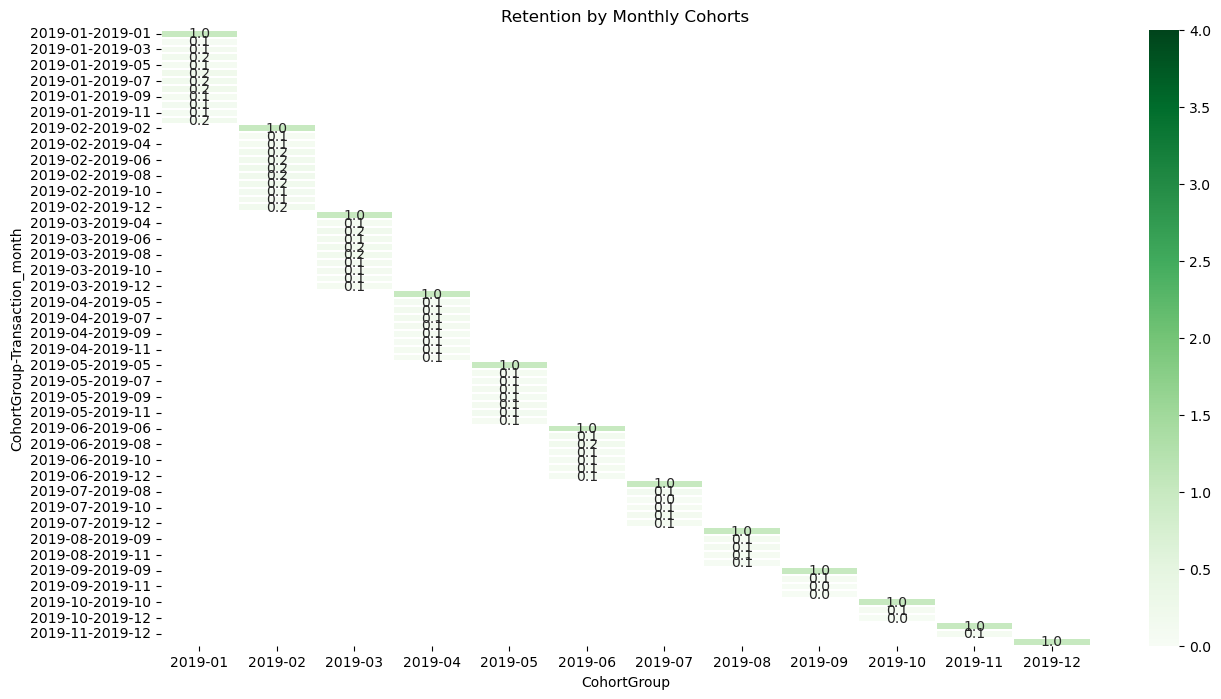

In [194]:
plt.figure(figsize=(15,8))
plt.title('Retention by Monthly Cohorts')
sns.heatmap(data=cust_retention,
            annot = True,
            cmap = "Greens",
            vmin = 0.0,
            vmax = list(cust_retention.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3)

plt.savefig("Retention By Monthly Cohorts")
plt.show()